In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator,ClassifierMixin
import random

In [2]:
def criaDataset(n=200):
  X = np.random.uniform(size=(n,2))
  y = np.array(X[:,0] > X[:,1],dtype=int)*2 -1
  return X,y

Xtr,ytr = criaDataset(200)

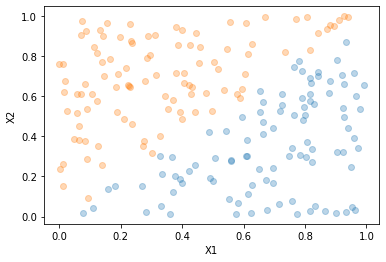

In [3]:
def plotDataset(X,y):
  plt.xlabel('X1')
  plt.ylabel('X2')
  for k in set(y):
    plt.plot(X[:,0][y==k],
             X[:,1][y==k],
             "o",alpha=0.3)

plotDataset(Xtr,ytr)

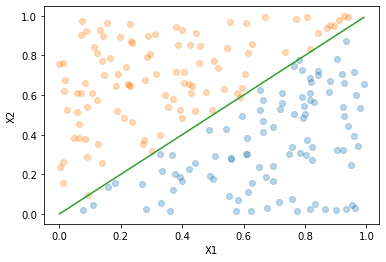

In [4]:
def plotHiperplano(X,y,vetor,intercept=0):
  x0min = min(X[:,0])
  x0max = max(X[:,0])
  xs = np.linspace(x0min,x0max,num=2)
  ys = (- vetor[0]/vetor[1])*xs-intercept/vetor[1]
  plt.plot(xs,ys)


plotDataset(Xtr,ytr)
plotHiperplano(Xtr,ytr,[-1,1])
plt.show()

# Definição da classe Perceptron com fit adaptado para selecionar a estratégia batch/online e retornar o History

In [5]:
class Perceptron (BaseEstimator,ClassifierMixin):
  def __init__(self,max_iter=1000):
    self.w = None# np.array([1,-1])
    self.activation=lambda a:(a>0)*2 -1
    self.max_iter = max_iter
    self.history = []

  #Funcao de FIT com selector de estrategia de custo batch/online
  def fit(self,X,y,batch=True):
    if batch:
      return self.fit_batch(X,y)
    else:
      return self.fit_online(X,y)

  #Fit online  
  def fit_online(self,X,y):
    self.w = np.random.uniform(-1,1,size=X.shape[1])
    indexs = list(range(X.shape[0]))
    
    for j in range(self.max_iter):
      any_error = False
      custo=0
      for i in sorted(indexs,key=lambda k:random.random()):
        x = X[i,:]
        ypred = self.predict(x)
        erro = y[i] - ypred #-1+1#1+1#-1-1
        custo += erro**2
        if erro !=0:
          any_error = True
        self.w = self.w + erro * x
      self.history.append(custo)
      if not any_error:
        print(j)
        break
    return(self.history)
  
  #Fit em batch
  def fit_batch(self,X,y):
    self.w = np.random.uniform(-1,1,size=X.shape[1])
    #indexs = list(range(X.shape[0]))
    for j in range(self.max_iter):
      ypred = self.predict(X)
      erros = y - ypred
      custo = np.sum(erros**2)
      if custo == 0:
        print(j)
        self.history.append(custo)
        break
      self.w += X.T @ erros
      self.history.append(custo)
    print(j)
    return self.history

  def predict(self,X,y=None):
    a = X @ self.w
    ypred = self.activation(a)
    return ypred


def plotHistory(hist):
   plt.plot(hist)

# Exemplo de estratégia de FIT em BATCH

44
44
1.0
[ 147.8501321  -147.86949802]


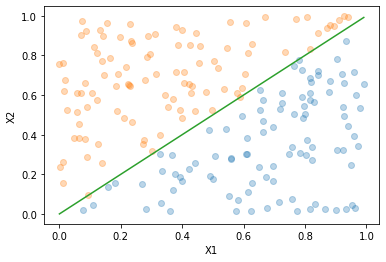

In [11]:
perceptron = Perceptron()
history = perceptron.fit(Xtr,ytr)
ypred = perceptron.predict(Xtr)
print(sum(ypred==ytr)/len(ytr))
print(perceptron.w)
plotDataset(Xtr,ytr)
plotHiperplano(Xtr,ytr,perceptron.w)

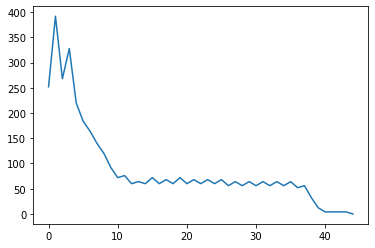

In [12]:
plotHistory(history)

In [13]:
history

[252,
 392,
 268,
 328,
 220,
 184,
 164,
 140,
 120,
 92,
 72,
 76,
 60,
 64,
 60,
 72,
 60,
 68,
 60,
 72,
 60,
 68,
 60,
 68,
 60,
 68,
 56,
 64,
 56,
 64,
 56,
 64,
 56,
 64,
 56,
 64,
 52,
 56,
 32,
 12,
 4,
 4,
 4,
 4,
 0]

# Exemplo de estratégia de FIT ONLINE

11
1.0
[ 9.61267825 -9.66154713]


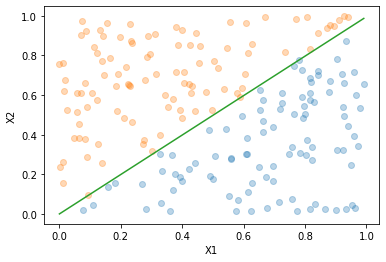

In [8]:
perceptron = Perceptron()
history = perceptron.fit(Xtr,ytr,batch=False)
ypred = perceptron.predict(Xtr)
print(sum(ypred==ytr)/len(ytr))
print(perceptron.w)
plotDataset(Xtr,ytr)
plotHiperplano(Xtr,ytr,perceptron.w)

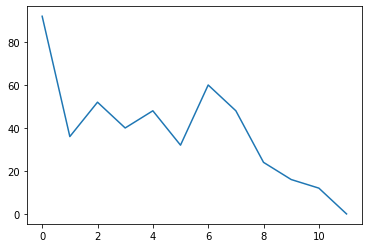

In [9]:
plotHistory(history)

In [10]:
history

[92, 36, 52, 40, 48, 32, 60, 48, 24, 16, 12, 0]